In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
df = pd.read_csv('data\loan_history.csv')

# Exploratory Data Analysis - Loans Dataset

This notebook performs comprehensive exploratory data analysis on the loans dataset to understand its structure, patterns, and relationships.

## 1. Dataset Overview

Let's examine the first and last few rows to understand the structure of our dataset.

In [ ]:
# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
       T_BDBEGINDATE  T_DMCREDITSUM
0    1      1/6/1900           0.01
1    2      1/6/1900         500.00
2    3     8/22/1902         500.00
3    4    12/30/1904        1500.00
4    5     9/29/1906        5000.00


In [ ]:
# Display last few rows
print("Last 5 rows of the dataset:")
print(df.tail())

Last 5 rows of the dataset:
                 T_BDBEGINDATE  T_DMCREDITSUM
1148302  1148303     11/6/2025         3150.0
1148303  1148304     11/6/2025        13750.0
1148304  1148305     11/6/2025        12000.0
1148305  1148306     11/6/2025        15000.0
1148306  1148307     11/6/2025         3000.0


## 2. Data Shape and Info

Understanding the dimensions and structure of our dataset.

In [ ]:
# Get shape of the dataset
print(f"Dataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Dataset Shape: (1148307, 3)
Number of Rows: 1148307
Number of Columns: 3


In [ ]:
# Get detailed information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148307 entries, 0 to 1148306
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0                  1148307 non-null  int64  
 1   T_BDBEGINDATE  1148307 non-null  object 
 2   T_DMCREDITSUM  1148307 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 26.3+ MB
None


In [ ]:
# Get column names
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['   ', 'T_BDBEGINDATE', 'T_DMCREDITSUM']


## 3. Descriptive Statistics

Summary statistics for all numerical columns.

In [ ]:
# Get descriptive statistics for numerical columns
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
                     T_DMCREDITSUM
count  1.148307e+06   1.148307e+06
mean   5.741540e+05   3.290622e+03
std    3.314878e+05   4.215629e+03
min    1.000000e+00   0.000000e+00
25%    2.870775e+05   1.000000e+03
50%    5.741540e+05   2.000000e+03
75%    8.612305e+05   3.500000e+03
max    1.148307e+06   1.200000e+05


In [ ]:
# Get more detailed statistics including percentiles
print("\nDetailed Statistics with Additional Percentiles:")
print(df.describe(percentiles=[.1, .25, .5, .75, .9, .95, .99]))


Detailed Statistics with Additional Percentiles:
                     T_DMCREDITSUM
count  1.148307e+06   1.148307e+06
mean   5.741540e+05   3.290622e+03
std    3.314878e+05   4.215629e+03
min    1.000000e+00   0.000000e+00
10%    1.148316e+05   5.000000e+02
25%    2.870775e+05   1.000000e+03
50%    5.741540e+05   2.000000e+03
75%    8.612305e+05   3.500000e+03
90%    1.033476e+06   8.000000e+03
95%    1.090892e+06   1.200000e+04
99%    1.136824e+06   2.000000e+04
max    1.148307e+06   1.200000e+05


In [ ]:
# Statistics for categorical columns
print("\nDescriptive Statistics for Categorical Columns:")
print(df.describe(include=['object']))


Descriptive Statistics for Categorical Columns:
       T_BDBEGINDATE
count        1148307
unique          4773
top        2/24/2016
freq            2758


## 4. Missing Values Analysis

Identifying and visualizing missing data in the dataset.

In [ ]:
# Check for missing values
print("Missing Values Count:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Missing Values Count:
Series([], dtype: int64)


In [ ]:
# Calculate missing value percentages
print("\nMissing Values Percentage:")
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_percent.index,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
print(missing_df)


Missing Values Percentage:
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []


In [ ]:
# Visualize missing values with a bar chart
if missing_df.shape[0] > 0:
    plt.figure(figsize=(12, 6))
    plt.bar(missing_df['Column'], missing_df['Missing_Percentage'])
    plt.xlabel('Columns')
    plt.ylabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

No missing values found in the dataset!


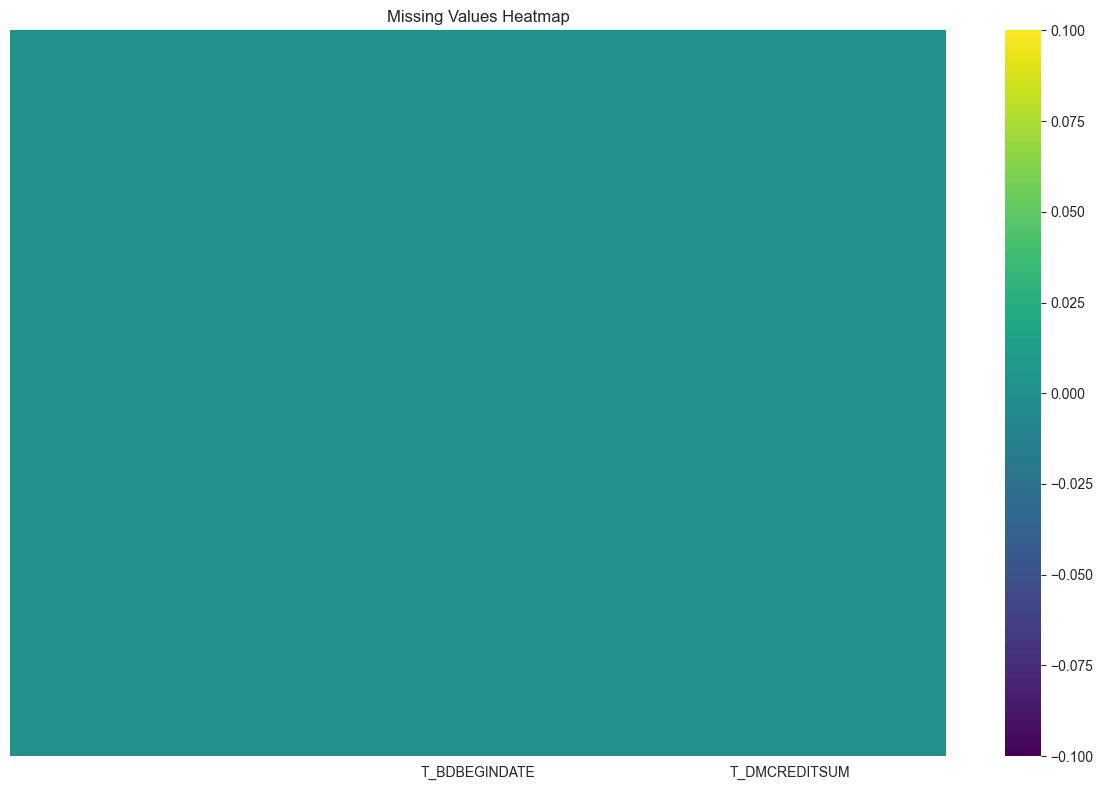

In [ ]:
# Create a heatmap for missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

## 5. Data Type Verification

Checking and verifying data types of all columns.

In [ ]:
# Display data types
print("Data Types:")
print(df.dtypes)

Data Types:
                   int64
T_BDBEGINDATE     object
T_DMCREDITSUM    float64
dtype: object


In [ ]:
# Count of each data type
print("\nData Type Counts:")
print(df.dtypes.value_counts())


Data Type Counts:
int64      1
object     1
float64    1
Name: count, dtype: int64


In [ ]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical Columns ({len(numerical_cols)}): {numerical_cols}")
print(f"\nCategorical Columns ({len(categorical_cols)}): {categorical_cols}")


Numerical Columns (2): ['   ', 'T_DMCREDITSUM']

Categorical Columns (1): ['T_BDBEGINDATE']


## 6. Univariate Analysis

Analyzing individual variables in the dataset.

In [ ]:
# Analyze categorical variables
print("Categorical Variables Analysis:\n")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")
    print("-" * 50)

Categorical Variables Analysis:


T_BDBEGINDATE:
T_BDBEGINDATE
2/24/2016     2758
1/31/2013     1026
3/19/2015     1020
1/30/2013      990
12/25/2013     981
              ... 
3/21/2011        1
1/4/2025         1
2/22/2015        1
9/29/1906        1
8/22/1902        1
Name: count, Length: 4773, dtype: int64
Unique values: 4773
--------------------------------------------------


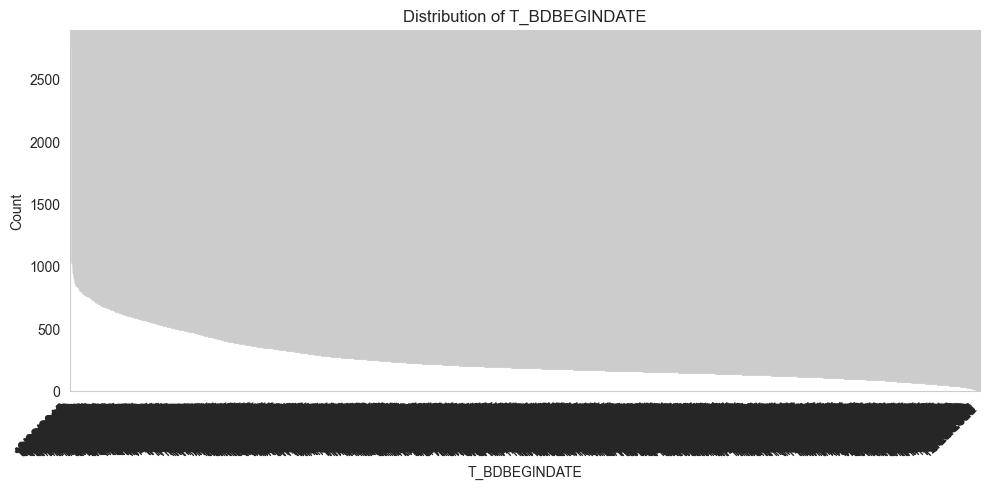

In [ ]:
# Visualize categorical variables
for col in categorical_cols[:5]:  # Limit to first 5 categorical columns
    plt.figure(figsize=(10, 5))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

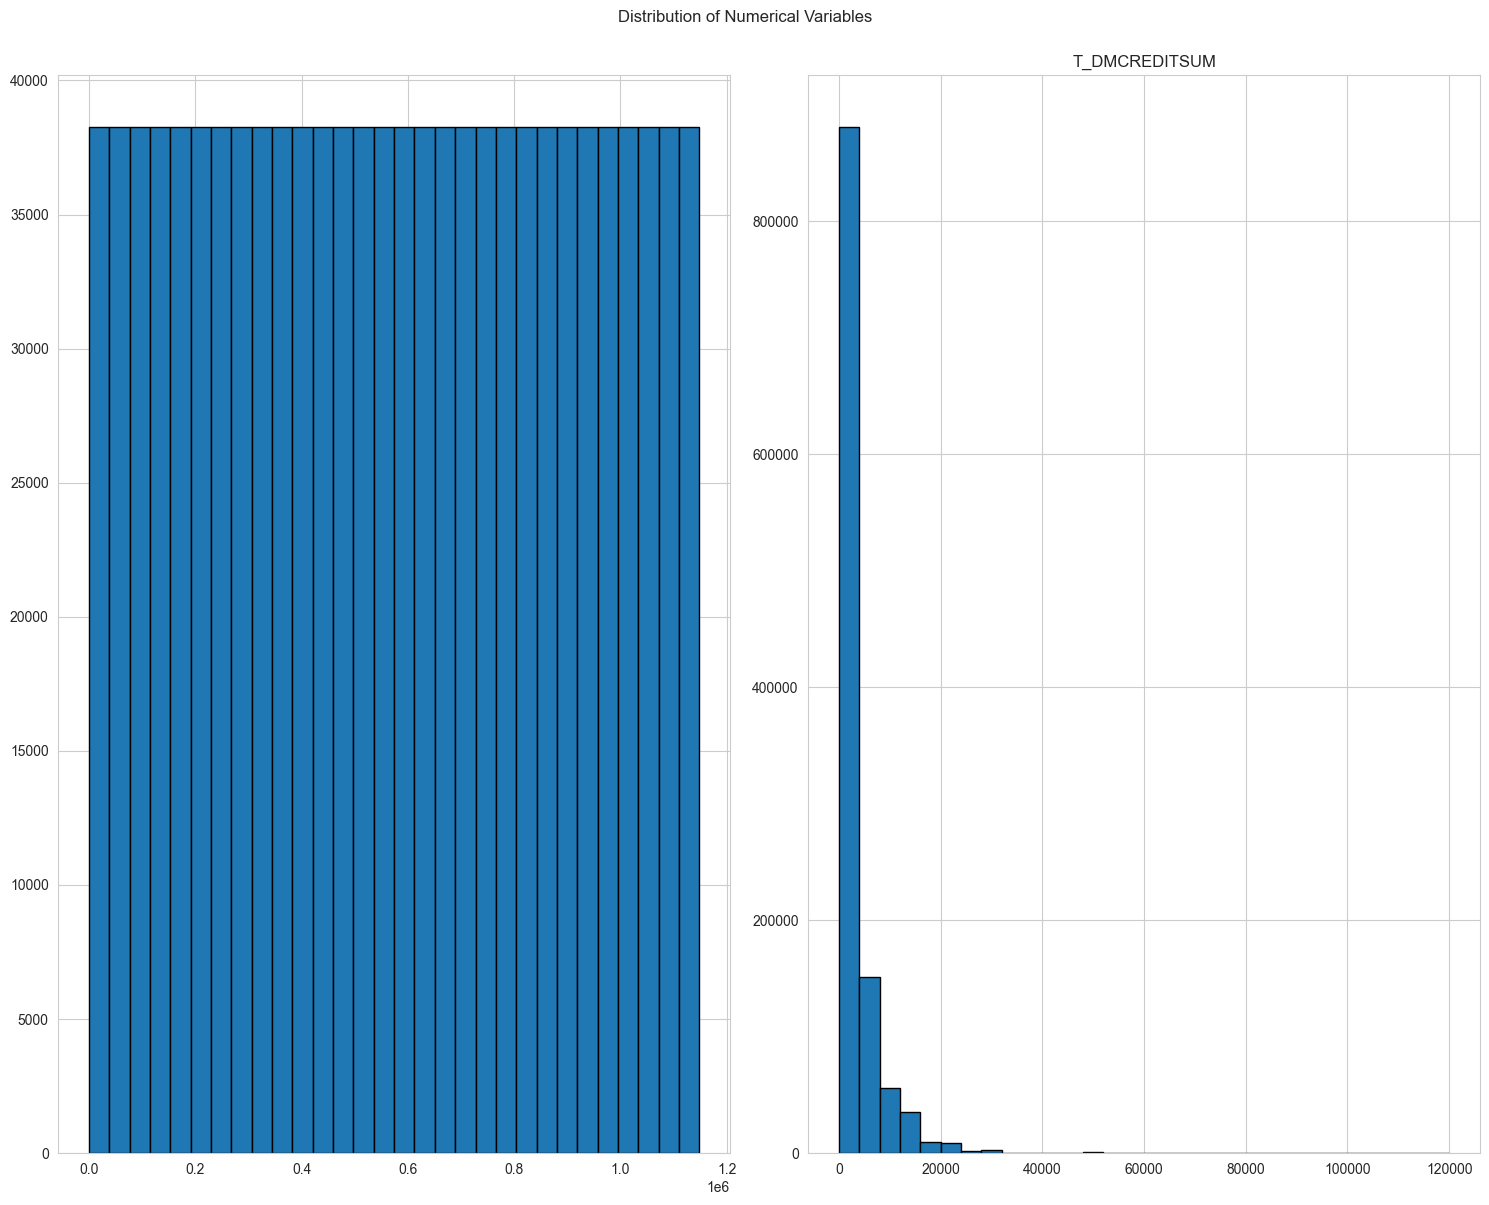

In [ ]:
# Histograms for numerical variables
df[numerical_cols].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Variables', y=1.00)
plt.tight_layout()
plt.show()

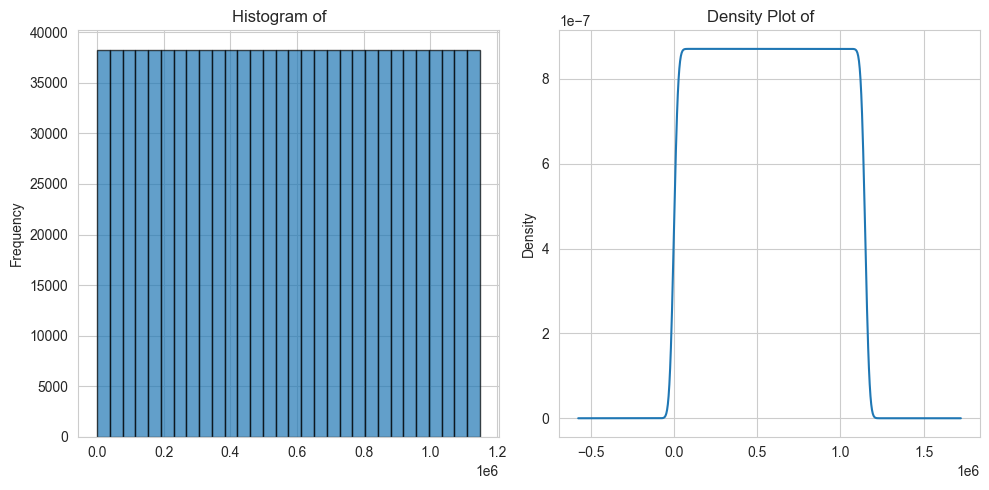

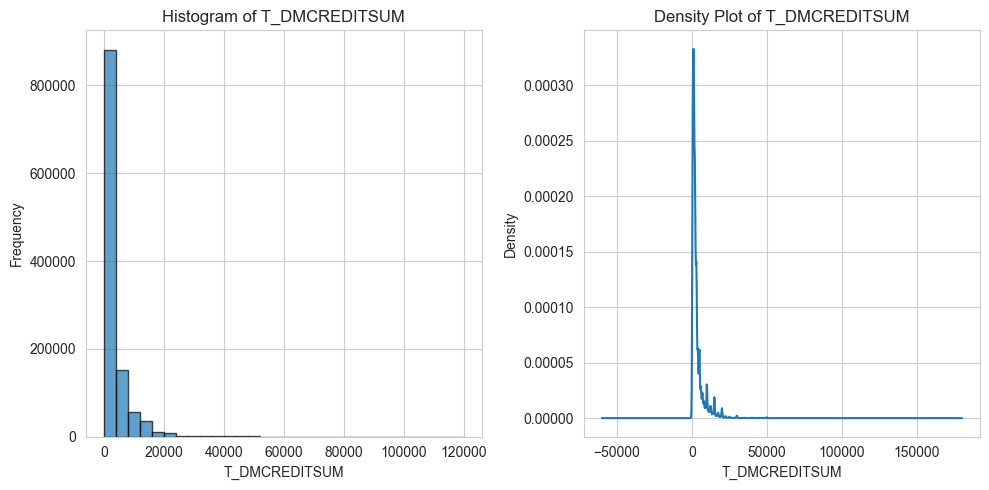

In [ ]:
# Individual analysis of numerical variables with KDE
for col in numerical_cols[:6]:  # Limit to first 6 numerical columns
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    df[col].dropna().plot(kind='kde')
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

## 7. Correlation Analysis

Examining relationships between numerical variables.

In [ ]:
# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                         T_DMCREDITSUM
               1.000000       0.512035
T_DMCREDITSUM  0.512035       1.000000


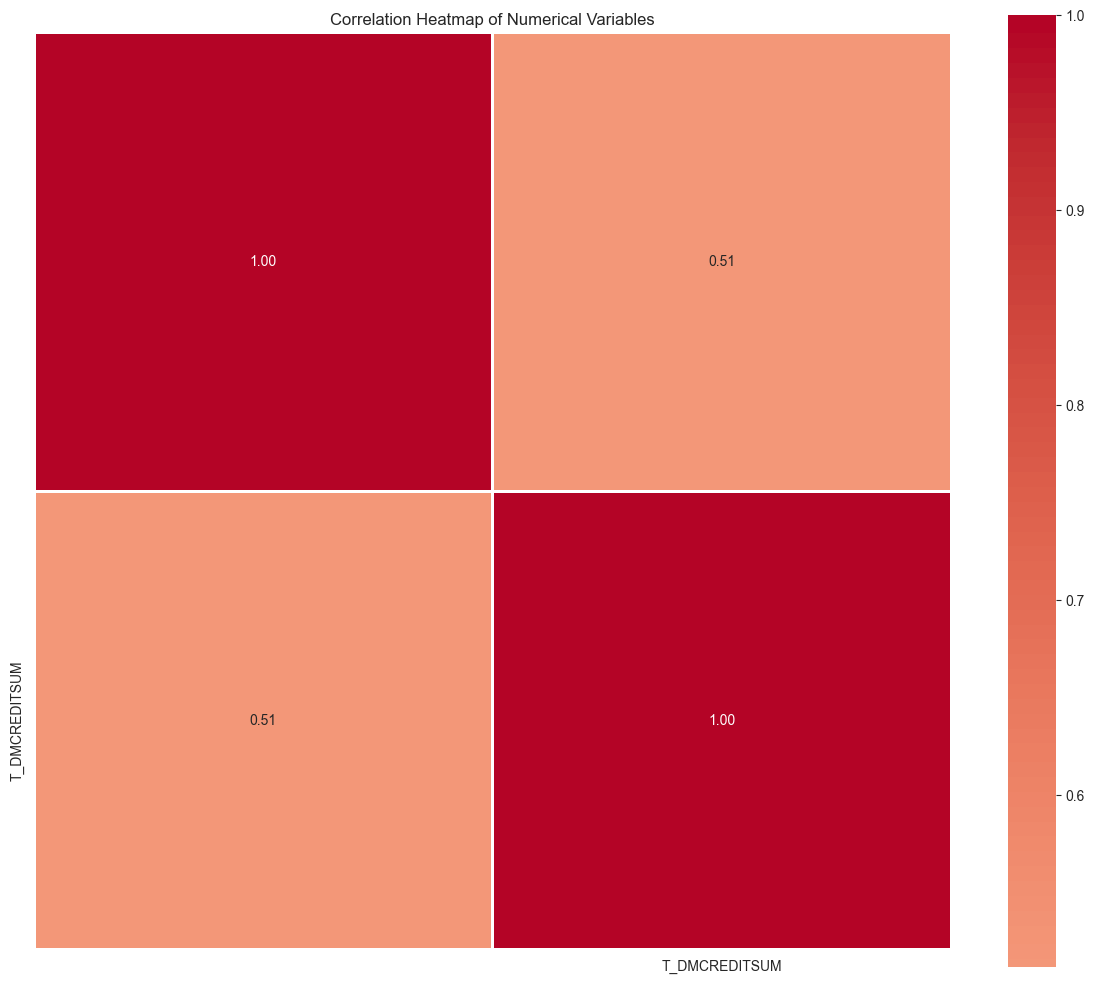

In [ ]:
# Visualize correlation matrix with heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

In [ ]:
# Find highly correlated pairs
print("\nHighly Correlated Pairs (|correlation| > 0.7):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    print(high_corr_df.sort_values('Correlation', ascending=False))
else:
    print("No highly correlated pairs found.")


Highly Correlated Pairs (|correlation| > 0.7):
No highly correlated pairs found.


## 8. Outlier Detection

Identifying outliers using box plots and IQR method.

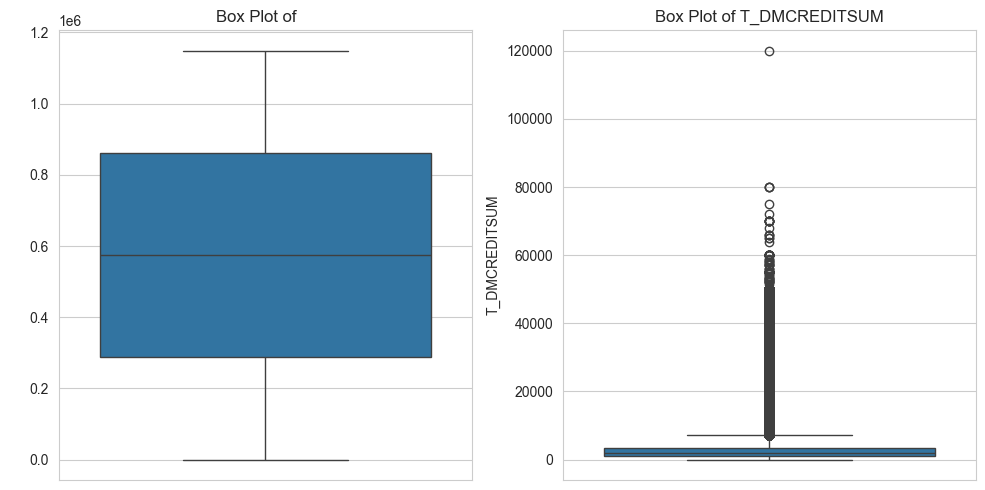

In [ ]:
# Box plots for all numerical variables
fig, axes = plt.subplots(nrows=(len(numerical_cols)+2)//3, ncols=3, figsize=(15, 5*((len(numerical_cols)+2)//3)))
axes = axes.flatten() if len(numerical_cols) > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, ax=axes[idx])
    axes[idx].set_title(f'Box Plot of {col}')
    axes[idx].set_ylabel(col)

# Hide extra subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
# Detect outliers using IQR method
print("Outlier Detection using IQR Method:\n")

outlier_summary = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Column': col,
        'Outlier_Count': outlier_count,
        'Outlier_Percentage': outlier_percentage,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound
    })
    
    print(f"{col}:")
    print(f"  Lower Bound: {lower_bound:.2f}")
    print(f"  Upper Bound: {upper_bound:.2f}")
    print(f"  Outliers: {outlier_count} ({outlier_percentage:.2f}%)")
    print("-" * 50)

outlier_df = pd.DataFrame(outlier_summary)
print("\nOutlier Summary:")
print(outlier_df)

Outlier Detection using IQR Method:

   :
  Lower Bound: -574152.00
  Upper Bound: 1722460.00
  Outliers: 0 (0.00%)
--------------------------------------------------
T_DMCREDITSUM:
  Lower Bound: -2750.00
  Upper Bound: 7250.00
  Outliers: 123357 (10.74%)
--------------------------------------------------

Outlier Summary:
          Column  Outlier_Count  Outlier_Percentage  Lower_Bound  Upper_Bound
0                             0             0.00000    -574152.0    1722460.0
1  T_DMCREDITSUM         123357            10.74251      -2750.0       7250.0


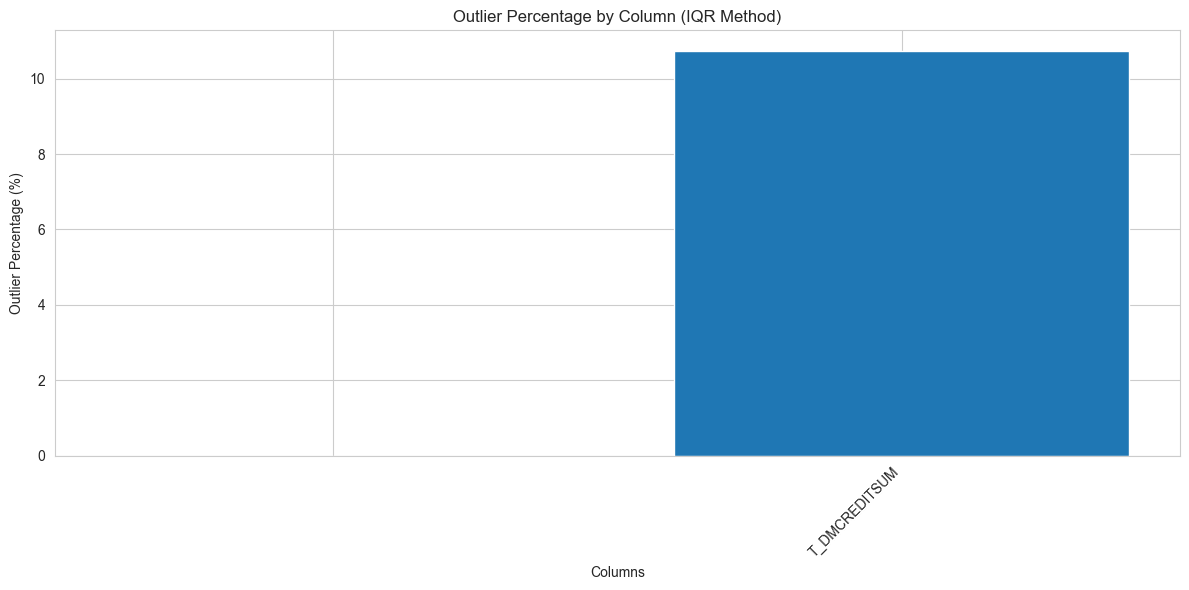

In [ ]:
# Visualize outlier percentages
plt.figure(figsize=(12, 6))
plt.bar(outlier_df['Column'], outlier_df['Outlier_Percentage'])
plt.xlabel('Columns')
plt.ylabel('Outlier Percentage (%)')
plt.title('Outlier Percentage by Column (IQR Method)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 9. Data Distribution Visualization

Comprehensive visualization of key variables in the loans dataset.

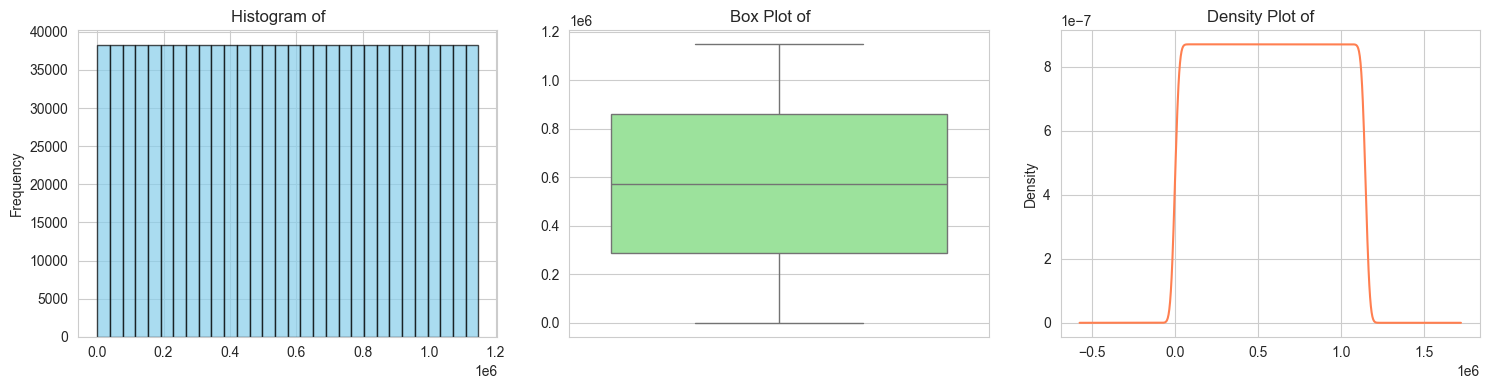

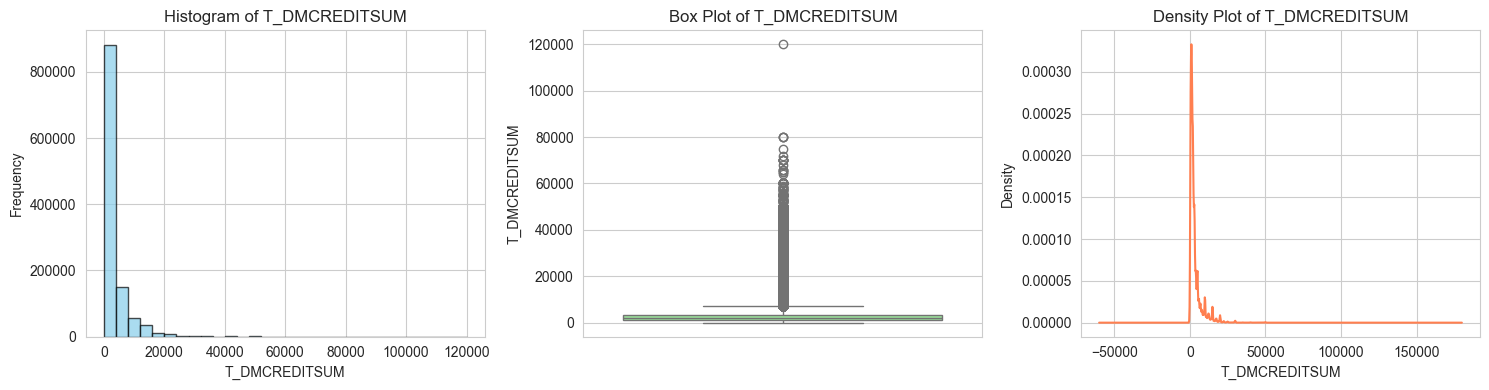

In [ ]:
# Combined distribution plots for numerical variables
for col in numerical_cols[:6]:  # Limit to first 6 for readability
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # Histogram
    axes[0].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[0].set_title(f'Histogram of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')
    
    # Box Plot
    sns.boxplot(data=df, y=col, ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Box Plot of {col}')
    
    # KDE Plot
    df[col].dropna().plot(kind='kde', ax=axes[2], color='coral')
    axes[2].set_title(f'Density Plot of {col}')
    axes[2].set_xlabel(col)
    
    plt.tight_layout()
    plt.show()

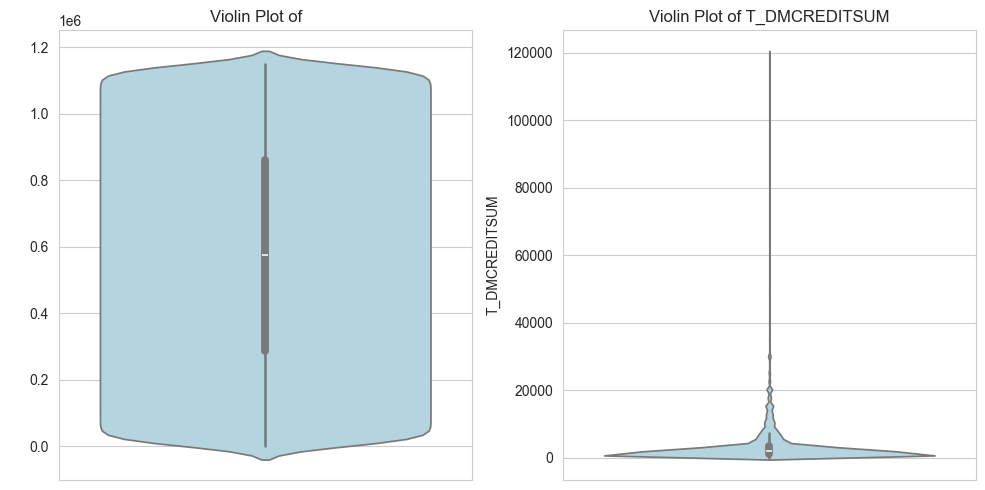

In [ ]:
# Violin plots for better distribution understanding
fig, axes = plt.subplots(nrows=(len(numerical_cols)+2)//3, ncols=3, figsize=(15, 5*((len(numerical_cols)+2)//3)))
axes = axes.flatten() if len(numerical_cols) > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    sns.violinplot(data=df, y=col, ax=axes[idx], color='lightblue')
    axes[idx].set_title(f'Violin Plot of {col}')

# Hide extra subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

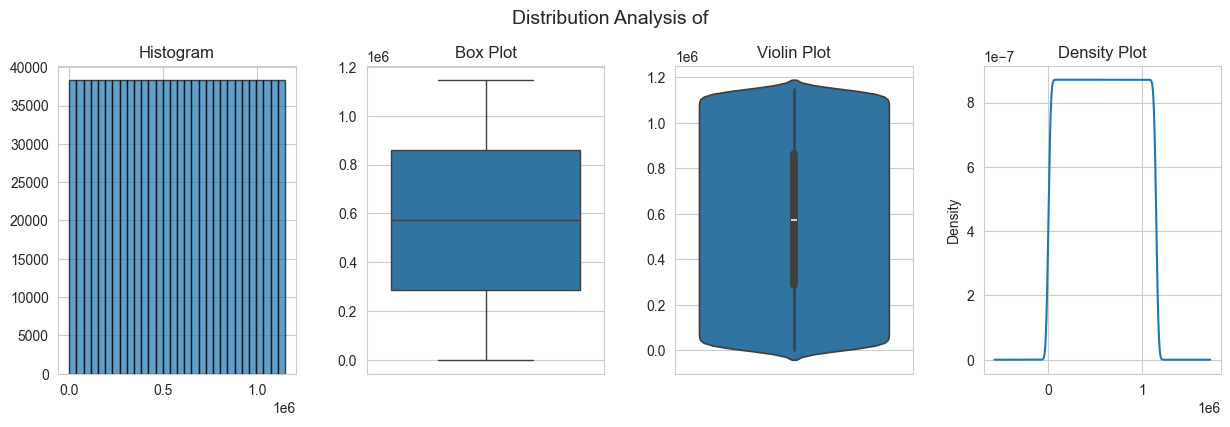

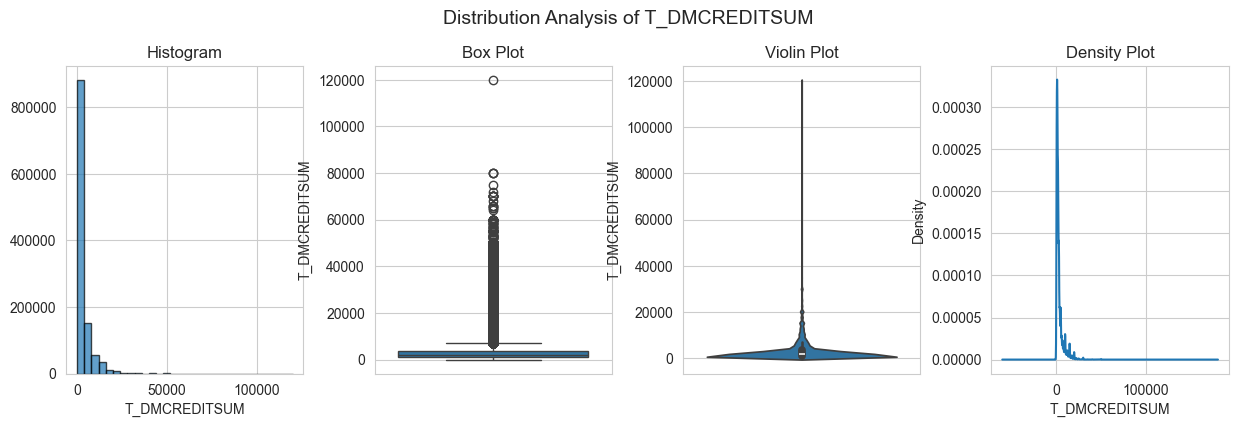

In [ ]:
# Distribution comparison using multiple plot types
for col in numerical_cols[:4]:  # First 4 numerical columns
    fig = plt.figure(figsize=(15, 4))
    
    # Create grid
    gs = fig.add_gridspec(1, 4, hspace=0.3, wspace=0.3)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    ax4 = fig.add_subplot(gs[0, 3])
    
    # Histogram with KDE
    df[col].dropna().hist(bins=30, ax=ax1, alpha=0.7, edgecolor='black')
    ax1.set_title(f'Histogram')
    ax1.set_xlabel(col)
    
    # Box Plot
    sns.boxplot(data=df, y=col, ax=ax2)
    ax2.set_title(f'Box Plot')
    
    # Violin Plot
    sns.violinplot(data=df, y=col, ax=ax3)
    ax3.set_title(f'Violin Plot')
    
    # KDE Plot
    df[col].dropna().plot(kind='kde', ax=ax4)
    ax4.set_title(f'Density Plot')
    ax4.set_xlabel(col)
    
    fig.suptitle(f'Distribution Analysis of {col}', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

## Summary

This EDA has covered:
- **Dataset Overview**: Structure and sample data
- **Data Shape**: Dimensions and data types
- **Descriptive Statistics**: Central tendencies and spread
- **Missing Values**: Identification and visualization
- **Data Types**: Verification and categorization
- **Univariate Analysis**: Individual variable distributions
- **Correlation Analysis**: Relationships between variables
- **Outlier Detection**: IQR method and visualization
- **Distribution Visualization**: Comprehensive visual analysis

Use the insights from this analysis to make informed decisions about data cleaning, feature engineering, and modeling.